# TP1 ABM

## Amaury Burtin


Importing libraries 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm

# Parts 1 and 2: Price with random agents

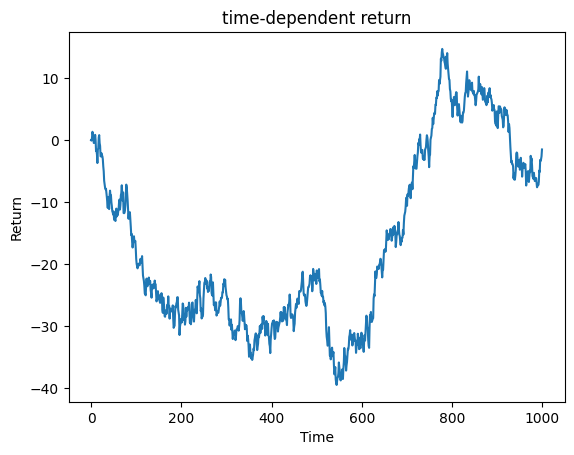

In [2]:
#Log-price generation

NIT = 1000

E = np.random.normal(0,1,NIT)
E[0] = 0
P = np.cumsum(E)


#Plotting the log-price
plt.plot(P)
plt.xlabel("Time")
plt.ylabel("Return")
plt.title("time-dependent return")
plt.show()

it's pretty much what you'd expect from a stock price 

# Part 3 : Strategy influence

## Question 1

We choose $a_{1,t} = sign(r_t)$

The expression of price : $p_{t+1} = p_t + r_t+1$

The expression of return : $r_{t+1} = \varepsilon_{t+1} + \phi*sign(r_t)$

E is the random values added each time

R is the return.

P is the price.

NIT is the number of iteration of the time-series (always indexed with i).

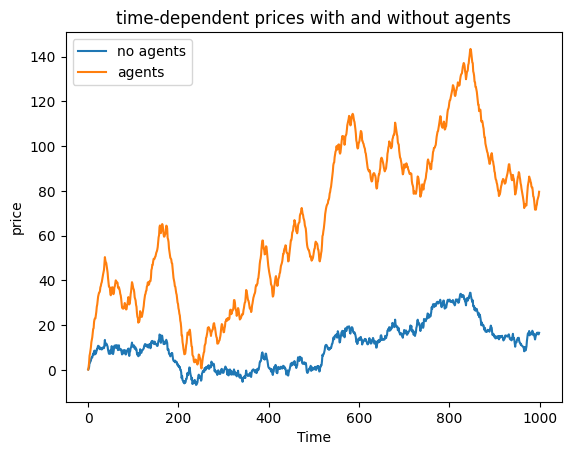

In [3]:
NIT = 1000
E = np.random.normal(0,1,NIT)
R = np.zeros(NIT)
R[0] = E[0] #R is the return 
phi = 1

for i in range(1,NIT) :
    R[i] = E[i] + phi*np.sign(R[i-1])

P_no_agents = np.cumsum(E)
P_agents = np.cumsum(R)

#plot section 

plt.plot(np.transpose(P_no_agents),label="no agents")
plt.plot(np.transpose(P_agents),label="agents")
plt.xlabel("Time")
plt.ylabel("price")
plt.title("time-dependent prices with and without agents")
plt.legend()
plt.show()

Using the simulations, an agent based model seems more unpredictable, ie more volatile (returns changes are stronger).

## Question 2

We keep the previous functions

In [4]:
VE = np.var(E)
VR = np.var(R)

print(VE,VR)

0.9728806607207737 1.9871927258904034


After making few simulations, it seems that the variance of $e_t$ is one. the variance depends on the phi parameter, note that for $\phi=1$ the variance seems to be 2. 

In addition, the larger the phi, the greater the variance of $r_t$ seems to be. 

This is likely to depend on the choice of the function $a_{1,t}$. 

## Question 3

We keep the previous functions

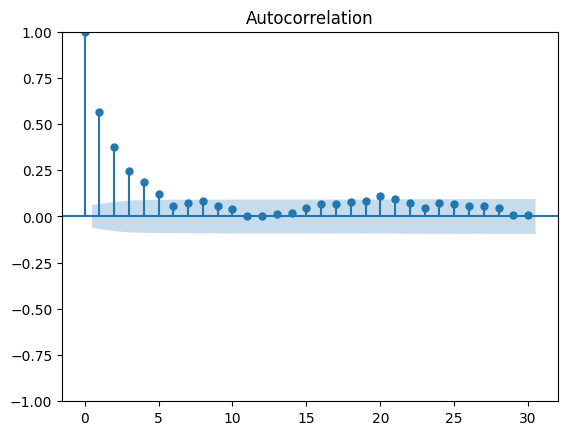

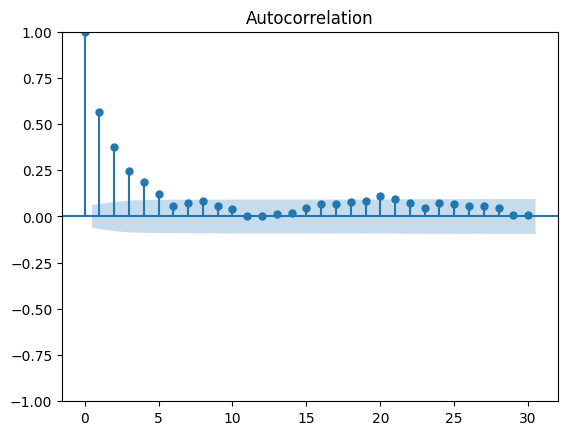

In [5]:
sm.graphics.tsa.plot_acf(R)

The autocorrelation of the price return seems to be a damped sin-like function.

Therefore we can infere that the model of the price return is an $AR(p)$. 

We have the model, but random variables still remains in the expression.

On the whole, we have the form but cannot clearly predict the values of the price return. 

## Question 4

m is the number of different values of phi (always indexed with j).

VR_m is the variance of the price return matrix for m values of $\phi$. 

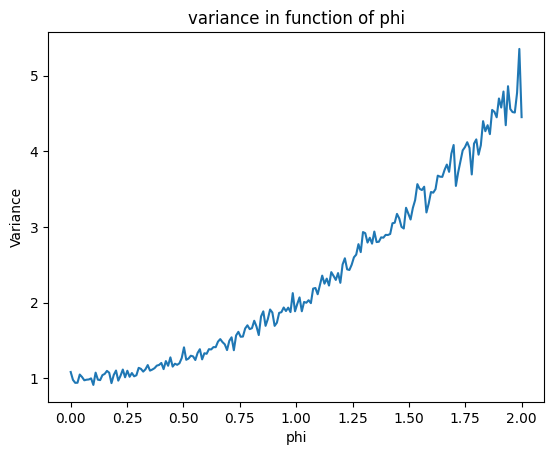

In [6]:
n = 1000
m = 200
E = np.random.normal(0,1,(m,n))
R = np.zeros((m,n))
R[0,0] = E[0,0] 
phi = np.linspace(0,2,m)


for j in range(m) :
    for i in range(1,n) :
        R[j,i] = E[j,i] + phi[j]*np.sign(R[j,i-1])

VR_m = np.zeros(m)
for j in range(m) :
    VR_m[j] = np.var(R[j,:])

plt.plot(phi,VR_m)
plt.xlabel("phi")
plt.ylabel("Variance")
plt.title("variance in function of phi")
plt.show()

The variance with respect to phi seems to follow an exponential model.

Nevertheless the variance seems to be more volatile with high values of phi.

## Question 5

We keep the previous functions

ACF is the autocorrelation function

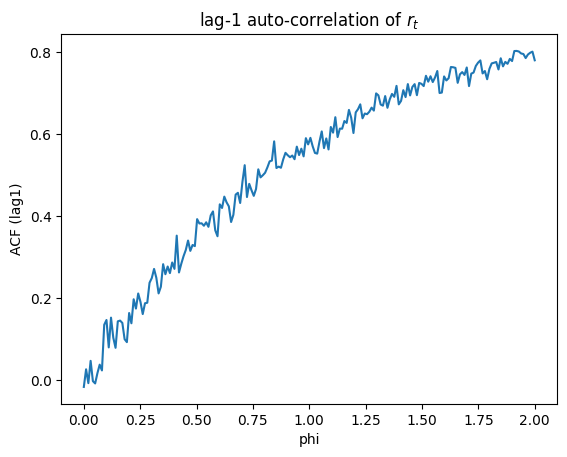

In [7]:
ACF = np.zeros(m)

for i in range(m):
    ACF[i]=sm.tsa.acf(R[i],nlags=1)[1]

plt.plot(phi,ACF)
plt.xlabel("phi")
plt.ylabel("ACF (lag1)")
plt.title("lag-1 auto-correlation of $r_t$")
plt.show()

the larger the $\phi$, the higher the lag-1 autocorrelation of $r_t$ seems to be. This can be interpreted as follows : The greater the $\phi$, the more the term of rank $t+1$ depends on the term $t$, which is consistent with the formula that defines our sequence. 

# Part 4 : Several strategies, several groups

## Introduction question

In [8]:
def MA_1D(R,k,i) :
    '''
    Function that compute the moving average of a serie R, with a window of size k at point i 
    R -> np.array
    k -> int
    i -> int
    '''
    if k>i : 
        return(np.mean(R[:i]))
    else : 
        return(np.mean(R[i-k:i]))

Two types of agent are used for this question: 
- one conditional agent
- one moving average agent

the value of $\phi_{1,2}$ can be changed 

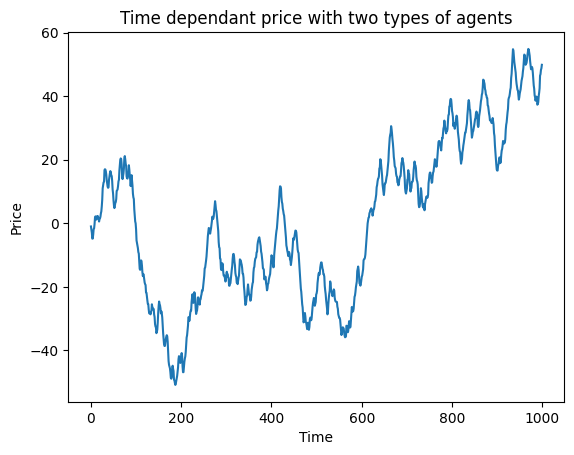

In [9]:
k1 = 1
k2 = 1
phi1 = 1
phi2 = 1
E = np.random.normal(0,1,NIT)
R = np.zeros(n)
R[0] = E[0]

for i in range(1,NIT) :
    R[i] = E[i] + phi1*np.sign(R[i-1]) + phi2*np.sign(R[i-1]-MA_1D(R,k1,i)) #two types of agents

P = np.cumsum(R)

plt.plot(P)
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Time dependant price with two types of agents")
plt.show()

## Question 1.1

p is the number of desired phi1 and phi2

Text(0.5, 1.0, 'Variance in function of $phi_1$ and $phi_2$')

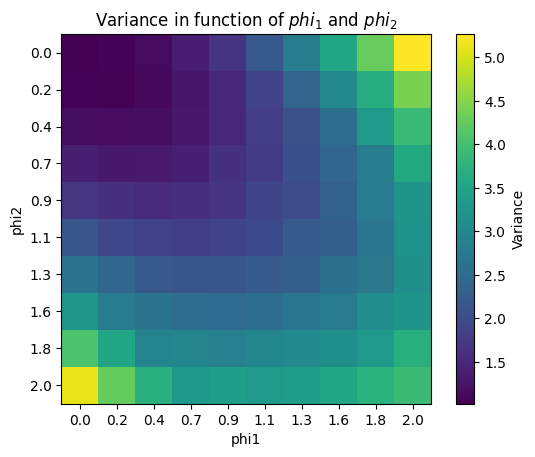

In [10]:
n = 1000
k1 = 1
k2 = 1
p = 10
E = np.random.normal(0,1,n)
VAR = np.zeros((p,p))
PHI1 = np.linspace(0,2,p)
PHI2 = np.linspace(0,2,p)
AutoCor = np.zeros((p,p)) #for next question


for p1 in range(len(PHI1)) :
    for p2 in range(len(PHI2)) :
        phi1 = PHI1[p1]
        phi2 = PHI2[p2]
        R = np.zeros(n)
        R[0] = E[0]
        for i in range(1,n) :
            R[i] = E[i] + phi1*np.sign(R[i-1]) + phi2*np.sign(MA_1D(R,k2,1)-MA_1D(R,k1,i))
        VAR[p1,p2] = np.var(R)
        AutoCor[p1,p2] = sm.tsa.acf(R,nlags=1)[1] #for next question
            

plt.imshow(VAR)
cbar= plt.colorbar()
cbar.set_label('Variance')
plt.xticks(np.arange(0,p,1),np.round(PHI1,1))
plt.yticks(np.arange(0,p,1),np.round(PHI2,1))
plt.xlabel("phi1")
plt.ylabel("phi2")
plt.title("Variance in function of $phi_1$ and $phi_2$")

The greater the sum of the phi values, the greater the variance.

## Question 1.2

Text(0.5, 1.0, 'lag-1 auto-correlatio in function of $phi_1$ and $phi_2$')

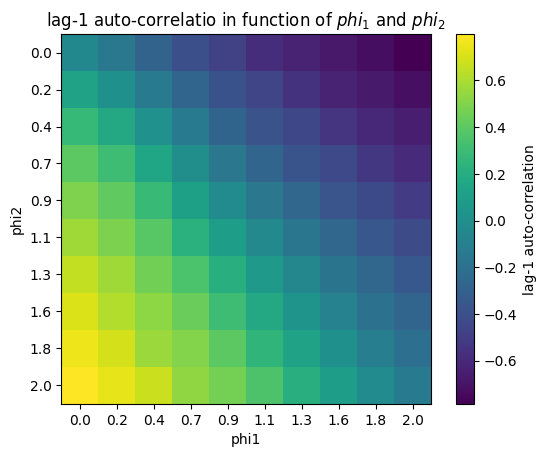

In [11]:
plt.imshow(AutoCor)
cbar= plt.colorbar()
cbar.set_label('lag-1 auto-correlation')
plt.xticks(np.arange(0,p,1),np.round(PHI1,1))
plt.yticks(np.arange(0,p,1),np.round(PHI2,1))
plt.xlabel("phi1")
plt.ylabel("phi2")
plt.title("lag-1 auto-correlatio in function of $phi_1$ and $phi_2$")

We obtained the heatmap of the lag-1 autocorrelation of the return. 

We notice that the autocorrelation is at its highest for phi1 near 0 and phi 2 near 2.

This means that the more the agents follow a trend following behaviour, and the more we can predict the future prices.

## Question 2

I is the number of experiment computed. 

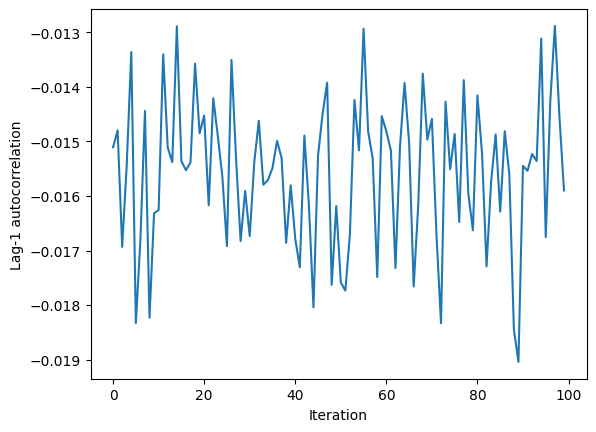

In [12]:
I = 100
n = 1000
k1 = 1
k2 = 5
p = 10
E = np.random.normal(0,1,n)
AutoCor = np.zeros(I)

for iteration in range(I) :
    PHI1 = np.random.uniform(0,2,(1,50)) #Agents that follow the first strat
    PHI2 = np.random.uniform(0,2,(1,50)) #Agents that follow the second strat
    R = np.zeros(n)
    R[0] = E[0]
    for i in range(1,n) :
        R[i] = E[i] + np.sum(PHI1)*np.sign(R[i-1]) + np.sum(PHI2)*np.sign(R[i-1]-MA_1D(R,k1,i))
    AutoCor[iteration] = sm.tsa.acf(R,nlags=1)[1]

plt.plot(AutoCor)
plt.xlabel("Iteration")
plt.ylabel("Lag-1 autocorrelation")
plt.show()

We notice that the lag-1 autocorrelation seems to be equally distributed near a value that is very small.

This means that we are not sure to have a predictable behaviour. This seems logical, as we have a large number of agents